Construct a model for scoring
-----------------

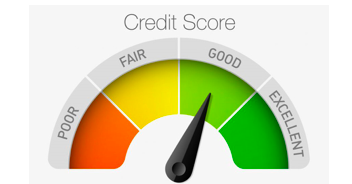

**The main objective of the project is to create a credit scoring algorithm that predicts the chance of a given loan applicant defaulting on loan repayment.**

About the data: 

- SK_ID_CURR: Is the ID of loan in our sample

- TARGET:  1 - client with payment difficulties and 0 are clients with no difficulties

- NAME_CONTRACT_TYPE: Identification if loan is cash or revolving.
 
- CODE_GENDER: Gender of the client.

- FLAG_OWN_CAR: Flag if the client owns a car.

- FLAG_OWN_REALTY: Flag if client owns a house or flat.

- CNT_CHILDREN: Number of children the client has.

- AMT_INCOME_TOTAL :Income of the client.

- AMT_CREDIT:Credit amount of the loan.

- AMT_ANNUITY: Loan annuity.

- AMT_GOODS_PRICE: For consumer loans it is the price of the goods for which the loan is given.

- NAME_TYPE_SUITE: Who was accompanying client when he was applying for the loan.

- NAME_INCOME_TYPE: Clients income type (businessman, working, maternity leave etc.

- NAME_EDUCATION_TYPE: Level of highest education the client achieved.

- NAME_FAMILY_STATUS: Family status of the client

- NAME_HOUSING_TYPE: What is the housing situation of the client (renting, living with parents, and so on).

- REGION_POPULATION_RELATIVE: Normalized population of region where client lives (higher number means the client lives in more pop.

- DAYS_BIRTH: Client's age in days at the time of application.

- DAYS_EMPLOYED: How many days before the application the person started current employment.

- DAYS_REGISTRATION: How many days before the application did client change his registration.

- DAYS_ID_PUBLISH: How many days before the application did client change the identity document with which he applied.

- OWN_CAR_AGE: Age of client's car

- FLAG_MOBIL: Did client provide mobile phone (1=YES, 0=NO)

- FLAG_EMP_PHONE: Did client provide work phone (1=YES, 0=NO)

- FLAG_WORK_PHONE:Did client provide home phone (1=YES, 0=NO)

- FLAG_CONT_MOBILE: Was mobile phone reachable (1=YES, 0=NO)

- FLAG_PHONE: Did client provide home phone (1=YES, 0=NO)

- FLAG_EMAIL: Did client provide email (1=YES, 0=NO)

- OCCUPATION_TYPE: What kind of occupation does the client have.

- CNT_FAM_MEMBERS: How many family members does client have.

- REGION_RATING_CLIENT: Our rating of the region where client lives (1,2,3)

- REGION_RATING_CLIENT_W_CITY:Our rating of the region where client lives with taking city into account (1,2,3).

- WEEKDAY_APPR_PROCESS_START: On which day of the week did the client apply for the loan

- HOUR_APPR_PROCESS_START:Approximately at what hour did the client apply for the loan

- REG_REGION_NOT_LIVE_REGION: Flag if client's permanent address does not match contact address (1=different, 0=same, at region 

- REG_REGION_NOT_WORK_REGION: Flag if client's permanent address does not match work address (1=different, 0=same, at region

- LIVE_REGION_NOT_WORK_REGION: Flag if client's contact address does not match work address (1=different, 0=same, at region level)

- REG_CITY_NOT_LIVE_CITY:Flag if client's permanent address does not match contact address (1=different, 0=same, at city level.

- REG_CITY_NOT_WORK_CITY:Flag if client's permanent address does not match work address (1=different, 0=same, at city level)

- LIVE_CITY_NOT_WORK_CITY: Flag if client's contact address does not match work address (1=different, 0=same, at city level)

- ORGANIZATION_TYPE: Type of organization where client works.

- EXT_SOURCE_1,EXT_SOURCE_2, EXT_SOURCE_3 :Normalized score from external data source

- APARTMENTS_AVG: Normalized information about building where the client lives, What is average.

- BASEMENTAREA_AVG: Normalized information about building where the client lives, What is average (_AVG suffix), modus.

- YEARS_BEGINEXPLUATATION_AVG: Normalized information about building where the client lives.

- YEARS_BUILD_AVG: Normalized information about building where the client lives, What is average

- COMMONAREA_AVG: Normalized information about building where the client lives.

- ELEVATORS_AVG: Normalized information about building where the client lives.

- ENTRANCES_AVG, FLOORSMAX_AVG, FLOORSMIN_AVG, LANDAREA_AVG: Normalized information about building where the client lives.

- FLAG_DOCUMENT_i: Did client provide document i (i=1,2, ...21)

- AMT_REQ_CREDIT_BUREA_(): Number of enquiries to Credit Bureau about the client one hour before application hour, day, week and so on










































In [1]:
# import certain libraries
import pandas as pd
import numpy as np
import seaborn as sns
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

import shap
from shap import TreeExplainer, summary_plot
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.metrics import roc_auc_score,fbeta_score, make_scorer

### We import only the csv file train from home credit default risk

In [2]:
df=pd.read_csv('application_train.csv', sep =',')

In [3]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [5]:
print(f' There are {df.shape[0]} rows in the dataset')
print(f' There are {df.shape[1]} columns in the dataset')

 There are 307511 rows in the dataset
 There are 122 columns in the dataset


In [6]:
df.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [7]:
#Numerical columns in the data
list(df.select_dtypes(['number']).columns)

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAR

In [8]:
#Categorical columns in the data
list(df.select_dtypes(['object']).columns)

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [9]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


### We perform some EDA 

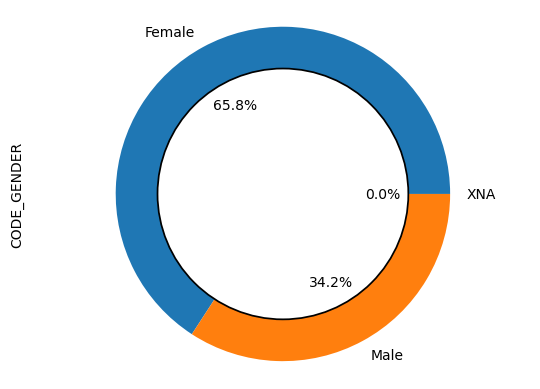

In [10]:
# The slices will be ordered and plotted counter-clockwise.
labels = ['Female', 'Male', 'XNA']


df['CODE_GENDER'].value_counts().plot.pie(center=(0, 0), radius=1.0, autopct='%1.1f%%', labels=labels)

        
#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show()  

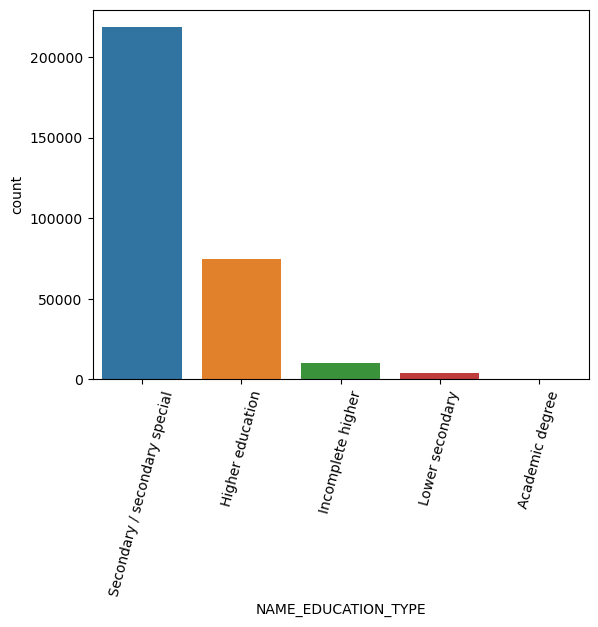

In [11]:
# Distribution of the type of education 
sns.countplot(x=df['NAME_EDUCATION_TYPE'])
plt.xticks(rotation=75)
plt.show();

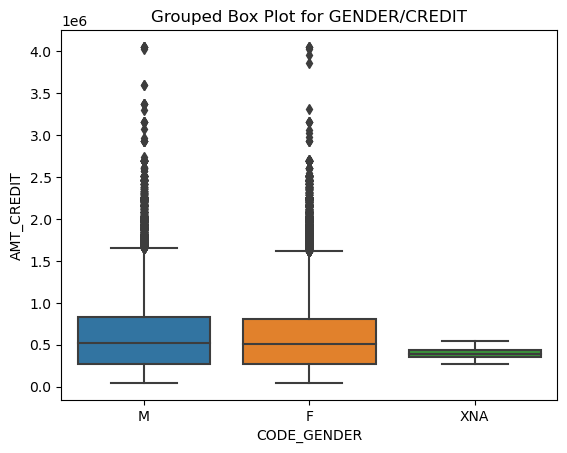

In [12]:
sns.boxplot(x='CODE_GENDER', y='AMT_CREDIT', data=df).set_title('Grouped Box Plot for GENDER/CREDIT');

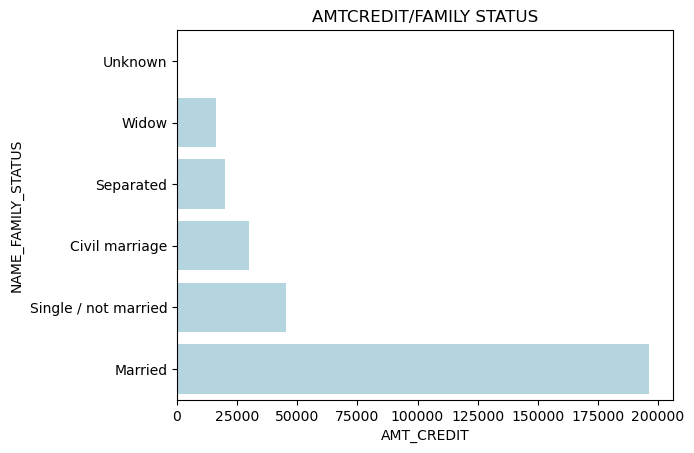

In [13]:
res = df.groupby(['NAME_FAMILY_STATUS'])['AMT_CREDIT'].count().reset_index().sort_values('AMT_CREDIT')
ax=sns.barplot(x='AMT_CREDIT', y='NAME_FAMILY_STATUS', color='lightblue', data=res).set_title('AMTCREDIT/FAMILY STATUS');

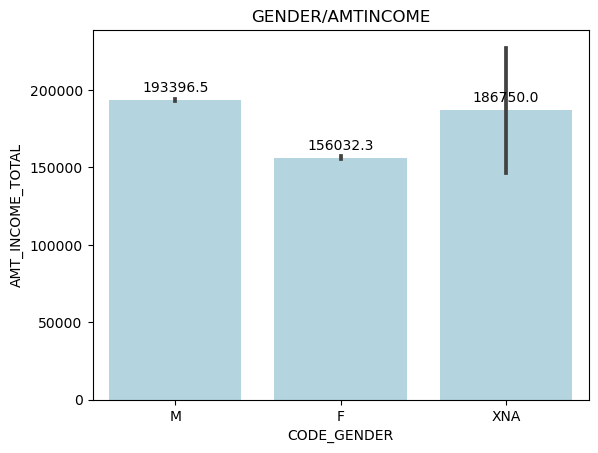

In [14]:
g= sns.barplot(x='CODE_GENDER', y='AMT_INCOME_TOTAL', color='lightblue', data=df)
for p in g.patches:
    g.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    g.set_title('GENDER/AMTINCOME')

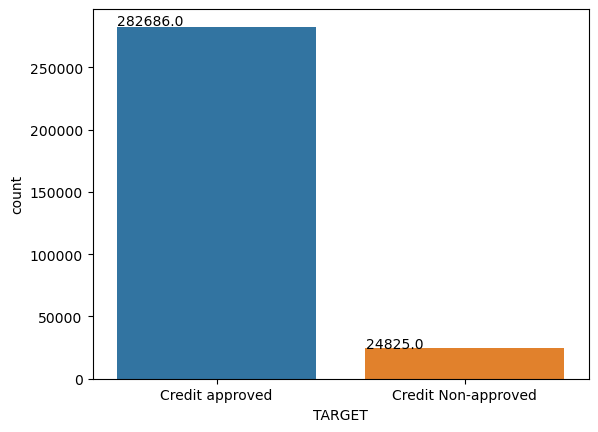

In [15]:
s = sns.countplot(x = 'TARGET',data = df)
for p in s.patches:
    s.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    s.set_xticklabels(['Credit approved','Credit Non-approved']);

0 means actually the credit is given and 1 means the credit is rejected.

In [16]:
r1 = df.groupby(['CNT_CHILDREN'])['AMT_CREDIT'].count().reset_index().sort_values('AMT_CREDIT')

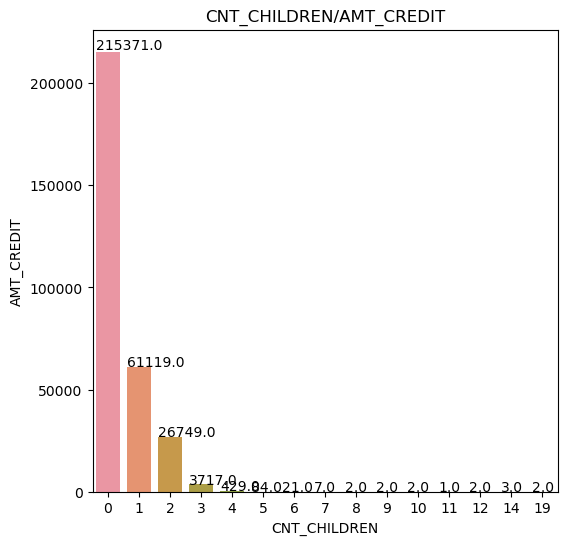

In [17]:
plt.figure(figsize=(6, 6))
s = sns.barplot(x='CNT_CHILDREN', y='AMT_CREDIT', data=r1)
for p in s.patches:
    s.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.title("CNT_CHILDREN/AMT_CREDIT")

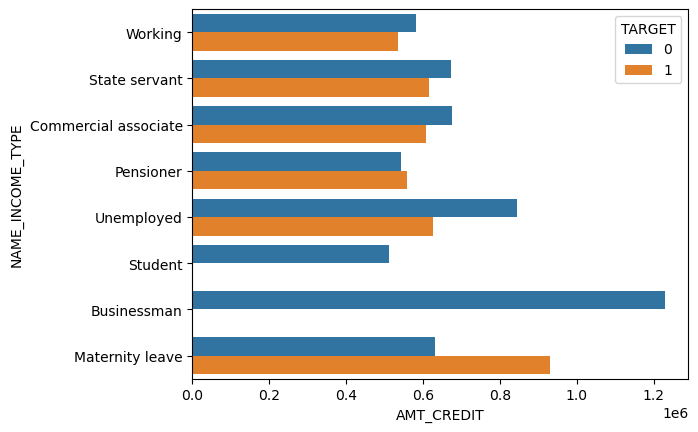

In [18]:
sns.barplot(data=df, y='NAME_INCOME_TYPE', x='AMT_CREDIT' , hue='TARGET',  errorbar=None)
plt.show()

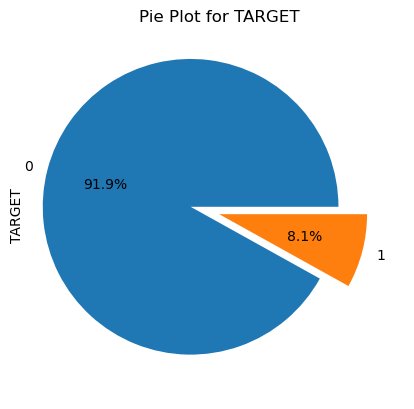

In [19]:
df['TARGET'].value_counts().plot.pie(center=(0, 0), explode = [0.2, 0], radius=1.0, autopct='%1.1f%%').set_title('Pie Plot for TARGET');

### Hence the data is imbalanced

In [20]:
df['DAYS_BIRTH'].head()

0    -9461
1   -16765
2   -19046
3   -19005
4   -19932
Name: DAYS_BIRTH, dtype: int64

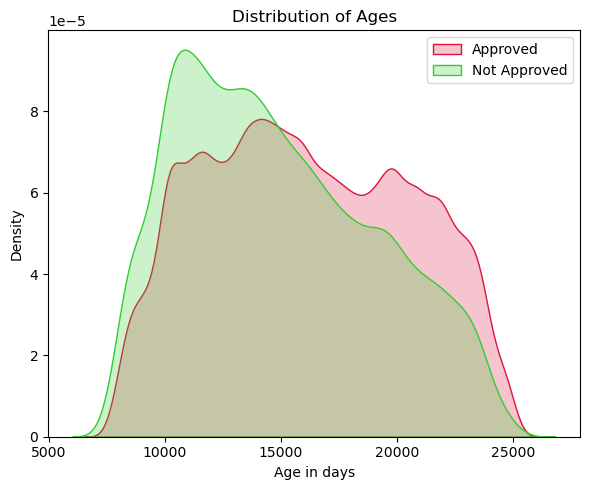

In [21]:
# Plotting the KDE Plot
fig, ax=plt.subplots(figsize=(6, 5))

sns.kdeplot(abs(df.loc[df['TARGET'] == 0, 'DAYS_BIRTH']), color='crimson', fill=True, label = 'Approved', ax=ax)
sns.kdeplot(abs(df.loc[df['TARGET'] == 1, 'DAYS_BIRTH']), color='limegreen', fill='True', label = 'Not Approved', ax=ax)

# Labeling of plot
plt.xlabel('Age in days')
plt.ylabel('Density'); 
plt.title('Distribution of Ages')
ax.legend()
plt.tight_layout()
plt.show()

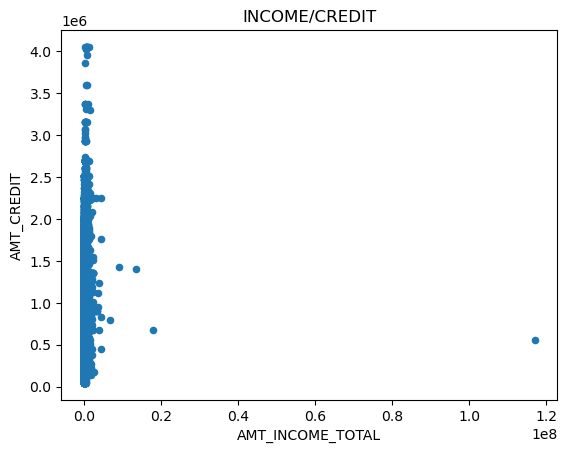

In [22]:
df.plot(kind = 'scatter', x="AMT_INCOME_TOTAL", y="AMT_CREDIT", title="INCOME/CREDIT");

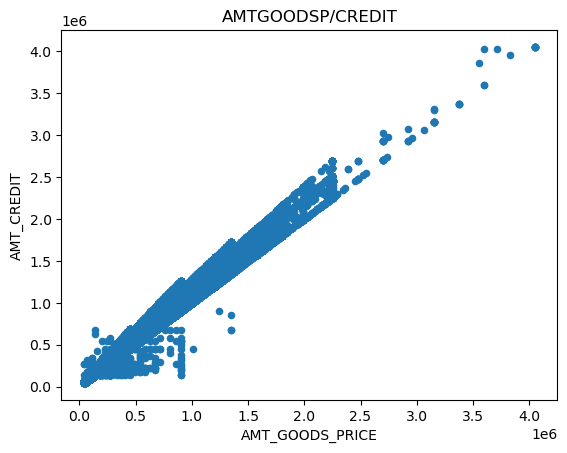

In [23]:
df.plot(kind = 'scatter', x="AMT_GOODS_PRICE", y="AMT_CREDIT", title="AMTGOODSP/CREDIT");

***There is positive correlation between AMT GOODS Price and CREDIT.***

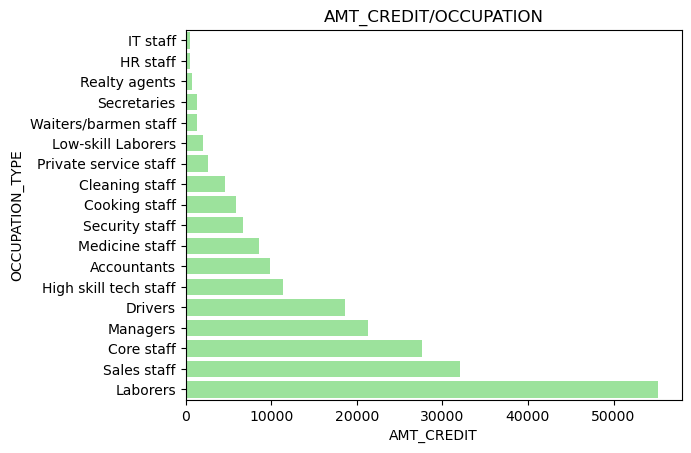

In [24]:
result = df.groupby(["OCCUPATION_TYPE"])['AMT_CREDIT'].count().reset_index().sort_values('AMT_CREDIT')
sns.barplot(x='AMT_CREDIT', y='OCCUPATION_TYPE', color='lightgreen', data=result)
plt.title("AMT_CREDIT/OCCUPATION");

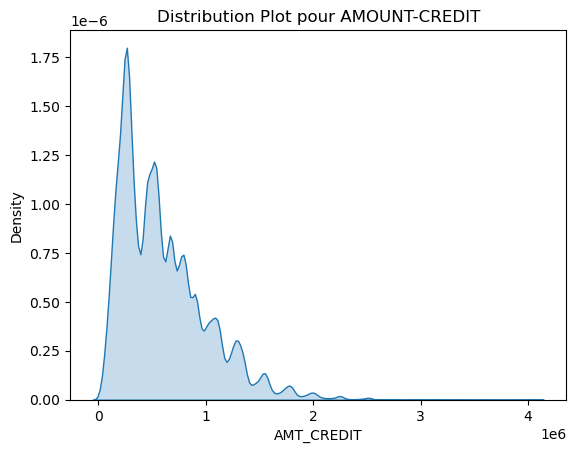

In [25]:
sns.kdeplot(df['AMT_CREDIT'], fill=True).set_title('Distribution Plot pour AMOUNT-CREDIT');

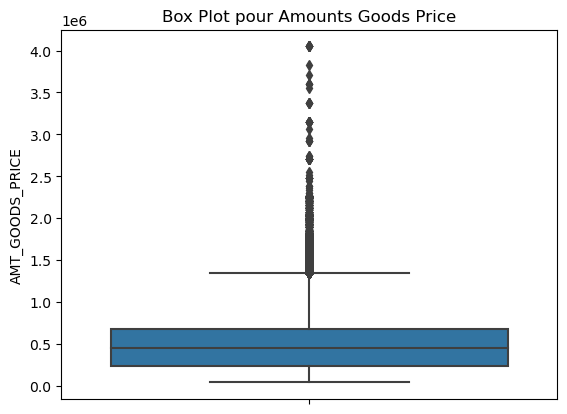

In [26]:
sns.boxplot(y='AMT_GOODS_PRICE', data=df).set_title('Box Plot pour Amounts Goods Price');

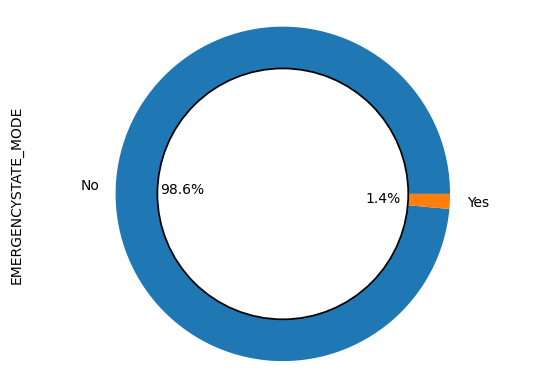

In [27]:
# The slices will be ordered and plotted counter-clockwise.

df['EMERGENCYSTATE_MODE'].value_counts().plot.pie(center=(0, 0), radius=1.0, 
                                                  explode = [0, 0], autopct='%1.1f%%')

        
#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show()  

**Get rid of the outliers**

In [28]:
# In order to remove the data we use capping;
def cap_data(df):
    for col in df.columns:
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.01,0.99]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

df=cap_data(df)

In [29]:
df.shape

(307511, 122)

In [30]:
df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [31]:
df = df.copy()

# Target
y = df['TARGET']

# Drop the target and 4 features 
X = df.drop(columns=['TARGET','FONDKAPREMONT_MODE','HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'])

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.10, random_state=42)

In [32]:
X_train.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=117)

In [33]:
X_train['NAME_INCOME_TYPE'].value_counts()

Working                 142801
Commercial associate     64543
Pensioner                49844
State servant            19521
Unemployed                  22
Student                     16
Businessman                  9
Maternity leave              3
Name: NAME_INCOME_TYPE, dtype: int64

In [34]:
X_train['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    196455
Higher education                  67449
Incomplete higher                  9245
Lower secondary                    3466
Academic degree                     144
Name: NAME_EDUCATION_TYPE, dtype: int64

In [35]:
X_train.isnull().sum()

SK_ID_CURR                        0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     37366
AMT_REQ_CREDIT_BUREAU_WEEK    37366
AMT_REQ_CREDIT_BUREAU_MON     37366
AMT_REQ_CREDIT_BUREAU_QRT     37366
AMT_REQ_CREDIT_BUREAU_YEAR    37366
Length: 117, dtype: int64

In [36]:
X_train.isnull().sum()

SK_ID_CURR                        0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     37366
AMT_REQ_CREDIT_BUREAU_WEEK    37366
AMT_REQ_CREDIT_BUREAU_MON     37366
AMT_REQ_CREDIT_BUREAU_QRT     37366
AMT_REQ_CREDIT_BUREAU_YEAR    37366
Length: 117, dtype: int64

In [37]:
df['CODE_GENDER'].unique()

array(['M', 'F', 'XNA'], dtype=object)

In [38]:
colnum=X_train._get_numeric_data().columns
colcat=X_train.select_dtypes(exclude=["number"]).columns

In [39]:
colnum=list(colnum)

In [40]:
columns_drop=['FLAG_OWN_CAR', 'FLAG_OWN_REALTY','NAME_EDUCATION_TYPE']

In [41]:
colcats = [name for name in colcat if name not in columns_drop]
print(colcats)

['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']


In [42]:
cat_values = [X_train[col].unique() for col in colcats]
cat_values

[array(['Cash loans', 'Revolving loans'], dtype=object),
 array(['F', 'M', 'XNA'], dtype=object),
 array(['Family', 'Unaccompanied', 'Spouse, partner', nan, 'Children',
        'Group of people', 'Other_B', 'Other_A'], dtype=object),
 array(['Working', 'Commercial associate', 'Pensioner', 'State servant',
        'Unemployed', 'Maternity leave', 'Student', 'Businessman'],
       dtype=object),
 array(['Single / not married', 'Separated', 'Married', 'Civil marriage',
        'Widow', 'Unknown'], dtype=object),
 array(['House / apartment', 'Municipal apartment', 'With parents',
        'Office apartment', 'Rented apartment', 'Co-op apartment'],
       dtype=object),
 array(['Core staff', 'Managers', 'Sales staff', 'Accountants', 'Laborers',
        nan, 'Drivers', 'Waiters/barmen staff', 'High skill tech staff',
        'Security staff', 'Cleaning staff', 'Realty agents',
        'Medicine staff', 'Cooking staff', 'Low-skill Laborers',
        'Private service staff', 'Secretaries', 'IT 

In [43]:
cat_drop_values = [X_train[col].unique() for col in columns_drop]
cat_drop_values

[array(['N', 'Y'], dtype=object),
 array(['Y', 'N'], dtype=object),
 array(['Higher education', 'Secondary / secondary special',
        'Incomplete higher', 'Lower secondary', 'Academic degree'],
       dtype=object)]

In [44]:
columns_drop

['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_EDUCATION_TYPE']

In [45]:
colcats

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [46]:
# Create the column transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [47]:
onehot_features = colcats
ordinal_features = columns_drop

type(onehot_features), type(ordinal_features)

(list, list)

In [48]:
# Define the pipelines for each type of feature
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler',StandardScaler()),
])

ordinal_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder())
])

onehot_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [49]:
# Create the ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num',numerical_pipeline, colnum),
    ('ordinal', ordinal_pipeline, ordinal_features),
    ('onehot', onehot_pipeline, onehot_features), 
], remainder='passthrough')

In [50]:
X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)

In [51]:
X_train=pd.DataFrame(X_train,columns=preprocessor.get_feature_names_out())

In [52]:
X_train.isnull().sum()

num__SK_ID_CURR                                0
num__CNT_CHILDREN                              0
num__AMT_INCOME_TOTAL                          0
num__AMT_CREDIT                                0
num__AMT_ANNUITY                               0
                                              ..
onehot__ORGANIZATION_TYPE_Transport: type 2    0
onehot__ORGANIZATION_TYPE_Transport: type 3    0
onehot__ORGANIZATION_TYPE_Transport: type 4    0
onehot__ORGANIZATION_TYPE_University           0
onehot__ORGANIZATION_TYPE_XNA                  0
Length: 223, dtype: int64

In [53]:
num_cols = X_train.filter(like='num__').columns.tolist()
num_cols

['num__SK_ID_CURR',
 'num__CNT_CHILDREN',
 'num__AMT_INCOME_TOTAL',
 'num__AMT_CREDIT',
 'num__AMT_ANNUITY',
 'num__AMT_GOODS_PRICE',
 'num__REGION_POPULATION_RELATIVE',
 'num__DAYS_BIRTH',
 'num__DAYS_EMPLOYED',
 'num__DAYS_REGISTRATION',
 'num__DAYS_ID_PUBLISH',
 'num__OWN_CAR_AGE',
 'num__FLAG_MOBIL',
 'num__FLAG_EMP_PHONE',
 'num__FLAG_WORK_PHONE',
 'num__FLAG_CONT_MOBILE',
 'num__FLAG_PHONE',
 'num__FLAG_EMAIL',
 'num__CNT_FAM_MEMBERS',
 'num__REGION_RATING_CLIENT',
 'num__REGION_RATING_CLIENT_W_CITY',
 'num__HOUR_APPR_PROCESS_START',
 'num__REG_REGION_NOT_LIVE_REGION',
 'num__REG_REGION_NOT_WORK_REGION',
 'num__LIVE_REGION_NOT_WORK_REGION',
 'num__REG_CITY_NOT_LIVE_CITY',
 'num__REG_CITY_NOT_WORK_CITY',
 'num__LIVE_CITY_NOT_WORK_CITY',
 'num__EXT_SOURCE_1',
 'num__EXT_SOURCE_2',
 'num__EXT_SOURCE_3',
 'num__APARTMENTS_AVG',
 'num__BASEMENTAREA_AVG',
 'num__YEARS_BEGINEXPLUATATION_AVG',
 'num__YEARS_BUILD_AVG',
 'num__COMMONAREA_AVG',
 'num__ELEVATORS_AVG',
 'num__ENTRANCES_AVG',


In [54]:
X_test=pd.DataFrame(X_test,columns=preprocessor.get_feature_names_out())
X_test.head()

,num__SK_ID_CURR,num__CNT_CHILDREN,num__AMT_INCOME_TOTAL,num__AMT_CREDIT,num__AMT_ANNUITY,num__AMT_GOODS_PRICE,num__REGION_POPULATION_RELATIVE,num__DAYS_BIRTH,num__DAYS_EMPLOYED,num__DAYS_REGISTRATION,...,onehot__ORGANIZATION_TYPE_Trade: type 4,onehot__ORGANIZATION_TYPE_Trade: type 5,onehot__ORGANIZATION_TYPE_Trade: type 6,onehot__ORGANIZATION_TYPE_Trade: type 7,onehot__ORGANIZATION_TYPE_Transport: type 1,onehot__ORGANIZATION_TYPE_Transport: type 2,onehot__ORGANIZATION_TYPE_Transport: type 3,onehot__ORGANIZATION_TYPE_Transport: type 4,onehot__ORGANIZATION_TYPE_University,onehot__ORGANIZATION_TYPE_XNA
0,1.035649,2.244149,0.492887,-0.334639,1.880501,-0.327000,-0.813024,0.629538,-0.457349,1.243738,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.624372,-0.586475,0.981044,1.750459,1.610092,1.775189,-1.014094,0.289282,-0.460032,0.964750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.322950,-0.586475,0.438647,-0.259174,0.890099,-0.115537,1.080569,-0.429599,-0.456479,0.707553,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.080380,-0.586475,0.981044,-0.873013,-0.147074,-0.861876,1.835342,-0.824535,-0.501373,-1.775526,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.053077,-0.586475,-0.646146,-0.736520,-0.811404,-0.836998,-0.145685,-0.985588,-0.459777,-0.666456,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
def remove_prefix(col_name):
    return col_name.replace('num__', '')

In [56]:
X_train = X_train.rename(columns=remove_prefix)
X_test=X_test.rename(columns=remove_prefix)

In [57]:
X_test.shape, X_train.shape

((30752, 223), (276759, 223))

**Create two new columns**

In [58]:
X_train['NEW_DAYS_EMPLOYED'] = X_train['DAYS_EMPLOYED'] /X_train['DAYS_BIRTH']
X_train['NEW_INCOME_CREDIT'] = X_train['AMT_INCOME_TOTAL'] / X_train['AMT_CREDIT']

In [59]:
X_test['NEW_DAYS_EMPLOYED'] = X_test['DAYS_EMPLOYED'] /X_test['DAYS_BIRTH']
X_test['NEW_INCOME_CREDIT'] = X_test['AMT_INCOME_TOTAL'] / X_test['AMT_CREDIT']

In [60]:
y_train.value_counts()

0    254453
1     22306
Name: TARGET, dtype: int64

In [61]:
X_train.shape

(276759, 225)

### Use Random Sampler  for balancing the dataset

In [62]:
#Undersampling
nm= RandomUnderSampler()
X_train, y_train=nm.fit_resample(X_train, y_train)

In [63]:
X_train.shape

(44612, 225)

In [64]:
X_test.shape

(30752, 225)

In [65]:
class_counts = y_train.value_counts()
is_balanced = class_counts[0] == class_counts[1]  # Assuming binary classification
balance_statement = "The y_train is balanced." if is_balanced else "The y_train is imbalanced."
print(balance_statement)

The y_train is balanced.


### Feature Selection

**In order to select features of the data we use XGB classifier**

In [66]:
model = XGBClassifier(eval_metric='logloss')
model.fit(X_train, y_train)
# feature importance
print(model.feature_importances_)

[0.00421093 0.00371136 0.00447026 0.00710345 0.00591225 0.00766026
 0.00428112 0.00785171 0.00602672 0.00487069 0.00472891 0.0072126
 0.         0.         0.00566189 0.         0.00349938 0.00471369
 0.00375648 0.00413272 0.0076535  0.00416637 0.0045401  0.00385934
 0.00414695 0.00852393 0.00384473 0.00329855 0.01082852 0.02381622
 0.03177943 0.00441589 0.00422324 0.00408805 0.00450103 0.00442257
 0.00610098 0.00495543 0.00485625 0.00442125 0.0038186  0.00463463
 0.00476075 0.00469477 0.00534535 0.00437287 0.00436022 0.00521904
 0.00492792 0.00478564 0.00335148 0.0039461  0.00680752 0.00376861
 0.00564096 0.00534414 0.0044931  0.00463264 0.00496307 0.00538008
 0.00696024 0.00525992 0.00641139 0.00553173 0.00436538 0.00692223
 0.00129167 0.00567262 0.00642792 0.00570524 0.00610093 0.00465593
 0.00535259 0.0047063  0.00408627 0.00809685 0.00533985 0.00606912
 0.00497934 0.         0.00851507 0.         0.00344098 0.00609496
 0.         0.00565751 0.         0.         0.         0.
 0. 

In [67]:
model.feature_importances_.shape

(225,)

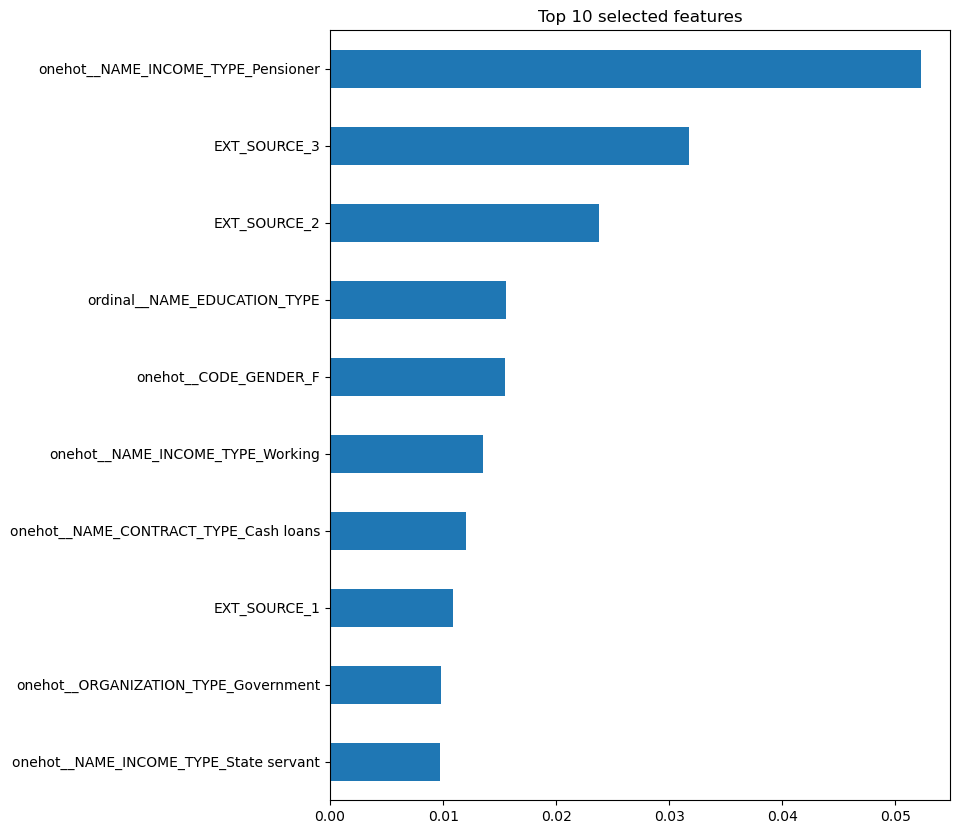

In [68]:
feat_imp = pd.Series(model.feature_importances_, index=X_train.columns)
feat_imp.nlargest(10).sort_values(ascending=True).plot(kind='barh', figsize=(8,10))
plt.title("Top 10 selected features")
plt.show()

In [69]:
unwanted = []
for col in X_train.columns:
    if col not in feat_imp.nlargest(160):
        unwanted.append(col)

In [70]:
len(unwanted)

65

In [71]:
# We consider only top 100 features
X_train=X_train.drop(columns=unwanted)
X_test=X_test.drop(columns=unwanted)

In [72]:
X_train.shape, X_test.shape

((44612, 160), (30752, 160))

In [73]:
y_train.shape, y_test.shape

((44612,), (30752,))

In [74]:
X_test.head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,onehot__ORGANIZATION_TYPE_Telecom,onehot__ORGANIZATION_TYPE_Trade: type 2,onehot__ORGANIZATION_TYPE_Trade: type 3,onehot__ORGANIZATION_TYPE_Trade: type 7,onehot__ORGANIZATION_TYPE_Transport: type 2,onehot__ORGANIZATION_TYPE_Transport: type 3,onehot__ORGANIZATION_TYPE_Transport: type 4,onehot__ORGANIZATION_TYPE_University,NEW_DAYS_EMPLOYED,NEW_INCOME_CREDIT
0,1.035649,2.244149,0.492887,-0.334639,1.880501,-0.327000,-0.813024,0.629538,-0.457349,1.243738,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.726484,-1.472890
1,-0.624372,-0.586475,0.981044,1.750459,1.610092,1.775189,-1.014094,0.289282,-0.460032,0.964750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.590254,0.560449
2,-1.322950,-0.586475,0.438647,-0.259174,0.890099,-0.115537,1.080569,-0.429599,-0.456479,0.707553,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.062570,-1.692483
3,1.080380,-0.586475,0.981044,-0.873013,-0.147074,-0.861876,1.835342,-0.824535,-0.501373,-1.775526,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.608067,-1.123745
4,0.053077,-0.586475,-0.646146,-0.736520,-0.811404,-0.836998,-0.145685,-0.985588,-0.459777,-0.666456,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.466500,0.877296


In [75]:
X_train.corr().shape[0]

160

In [76]:
# Create correlation matrix
corr_matrix = X_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.99)]

# Drop features from the train data
X_train=X_train.drop(columns=to_drop)

In [77]:
# Drop features from the test data
X_test=X_test.drop(columns=to_drop)

In [78]:
X_test.shape

(30752, 145)

In [79]:
X_train.shape

(44612, 145)

In [80]:
X_train.columns

Index(['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       ...
       'onehot__ORGANIZATION_TYPE_Telecom',
       'onehot__ORGANIZATION_TYPE_Trade: type 2',
       'onehot__ORGANIZATION_TYPE_Trade: type 3',
       'onehot__ORGANIZATION_TYPE_Trade: type 7',
       'onehot__ORGANIZATION_TYPE_Transport: type 2',
       'onehot__ORGANIZATION_TYPE_Transport: type 3',
       'onehot__ORGANIZATION_TYPE_Transport: type 4',
       'onehot__ORGANIZATION_TYPE_University', 'NEW_DAYS_EMPLOYED',
       'NEW_INCOME_CREDIT'],
      dtype='object', length=145)

In [81]:
y_train.shape

(44612,)

### Multiple Classifier Testing

In [82]:
models = ["XGBoost", "Gradient_Boosting", 
    "Decision_Tree", "Random_Forest", "AdaBoost", 
    "LogisticRegression"
         ]

classifiers = [
    XGBClassifier(n_estimators=100, eta=0.01, gamma=10, random_state=42),
    GradientBoostingClassifier(n_estimators=100, random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(max_depth=5, n_estimators=100, random_state=42),
    AdaBoostClassifier(n_estimators=100, random_state=42),
    LogisticRegression(penalty = 'l2', C=5, random_state=42)]

In [83]:
acc_scores = []
F2_score = []
Recall_score=[] 

for name, clf in zip(models, classifiers):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f2 = fbeta_score(y_test, y_pred, beta=2, average='binary')
    Rec=recall_score(y_test, y_pred)
    score = clf.score(X_test, y_test)
    acc_scores.append(score)
    F2_score.append(f2)
    Recall_score.append(Rec)

In [84]:
dg = pd.DataFrame()
dg['model'] = models
dg['score'] = acc_scores
dg['f2_score'] = F2_score
dg['Recall'] = Recall_score
dg =round(dg, 4)

In [85]:
dg

,model,score,f2_score,Recall
0,XGBoost,0.6729,0.4062,0.6784
1,Gradient_Boosting,0.6847,0.4200,0.6915
2,Decision_Tree,0.6866,0.3923,0.6352
3,Random_Forest,0.6622,0.4025,0.6836
4,AdaBoost,0.6833,0.4178,0.6888
5,LogisticRegression,0.6837,0.4132,0.6792


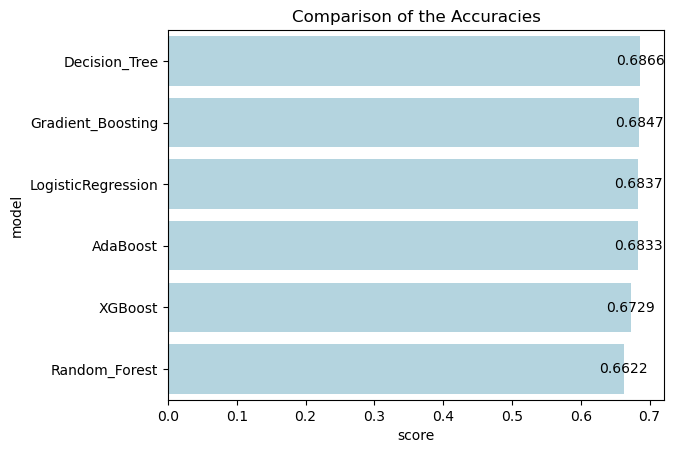

In [86]:
ax=sns.barplot(x="score",y="model",color='lightblue', data=dg, order=dg.sort_values('score', ascending = False).model)
for p in ax.patches:
    ax.annotate(p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(0, 0), textcoords='offset points',ha='center', va="center")
plt.title('Comparison of the Accuracies')
plt.show()

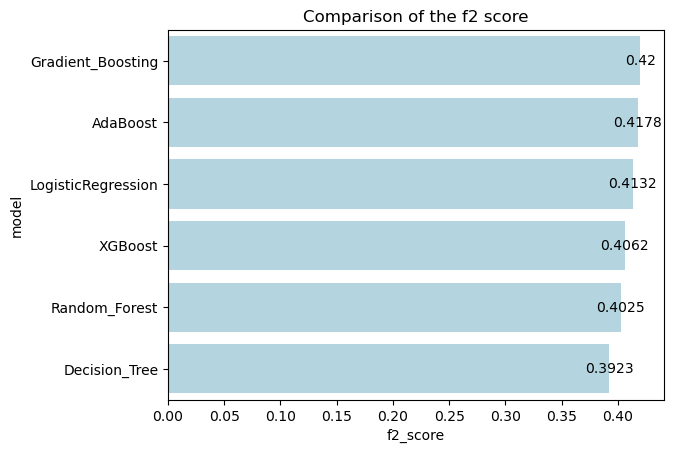

In [87]:
ax=sns.barplot(x="f2_score",y="model",color='lightblue', data=dg, order=dg.sort_values('f2_score',ascending = False).model)
for p in ax.patches:
    ax.annotate(p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(0, 0), textcoords='offset points',ha='center', va="center")
    
plt.title('Comparison of the f2 score')
plt.show()

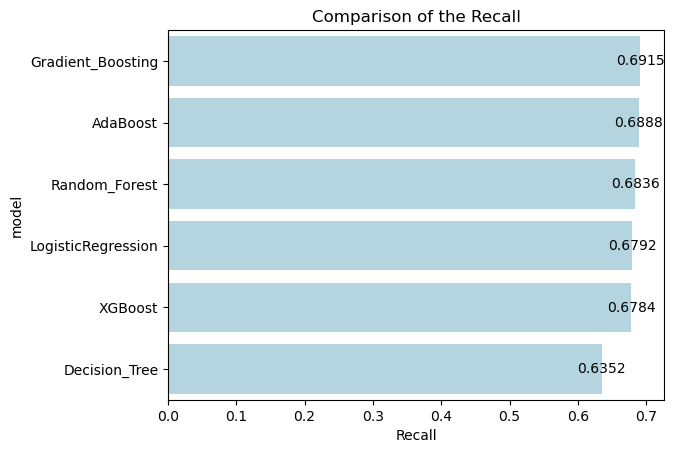

In [88]:
ax=sns.barplot(x="Recall",y="model",color='lightblue', data=dg, order=dg.sort_values('Recall',ascending = False).model)
for p in ax.patches:
    ax.annotate(p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(0, 0), textcoords='offset points',ha='center', va="center")
plt.title('Comparison of the Recall')  
plt.show()

In [89]:
# Find the index of the model with the best recall
best_index = Recall_score.index(max(Recall_score))

# Print the model with the best accuracy
print("The model with the best recall is:", models[best_index])
print("Recall:", Recall_score[best_index])    

The model with the best recall is: Gradient_Boosting
Recall: 0.6915442635966653


In [90]:
# Find the index of the model with the best recall
best_index = F2_score.index(max(F2_score))

# Print the model with the best accuracy
print("The model with the best f2_score is:", models[best_index])
print("Recall:", F2_score[best_index]) 

The model with the best f2_score is: Gradient_Boosting
Recall: 0.4200221825722139


Let us check whether we improve the recall with GridSearchCV.

**Gradient Boosting+ GridSearchCV**

In [91]:
xgb_params = {'max_depth': [3, 5, 7, 9],
              'n_estimators': [5, 10, 15, 20, 25, 50, 100],
              'learning_rate': [0.01, 0.05, 0.1]}
gridxgb = GridSearchCV(XGBClassifier(eval_metric='logloss'), xgb_params, cv=5) #Tuning the hyper-parameters
gridxgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7, 9],
                         'n_estimators': [5, 10, 15, 20, 25, 50, 100]})

In [92]:
# print best parameter after tuning
print(gridxgb.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(gridxgb.best_estimator_)

#Print recall score
print(gridxgb.best_score_)

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)
0.6865416749035931


In [93]:
xgb = gridxgb.best_estimator_


y_pred = xgb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[19302,  8931],
       [  779,  1740]])

In [94]:
print('Recall for Gradient Boost:', recall_score(y_test, y_pred))

Recall for Gradient Boost: 0.6907502977371973


In [95]:
# print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.68      0.80     28233
           1       0.16      0.69      0.26      2519

    accuracy                           0.68     30752
   macro avg       0.56      0.69      0.53     30752
weighted avg       0.90      0.68      0.76     30752



**Plot the feature importance of the Gradient Boost model**

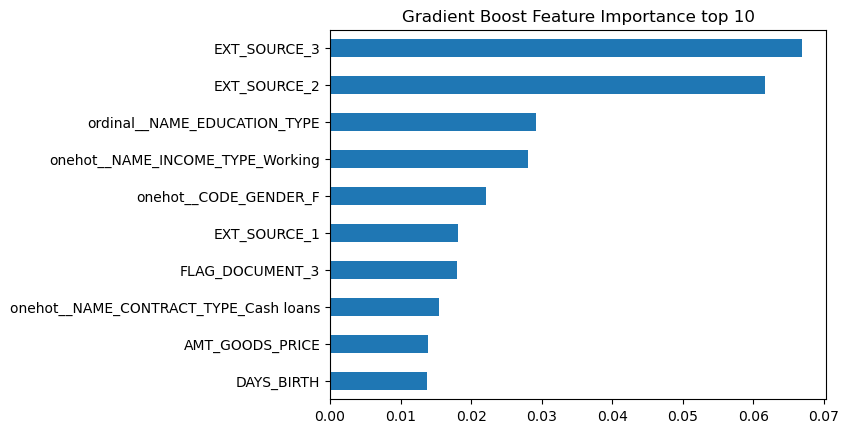

In [96]:
# Feature importance in decision tree
feat_importances = pd.Series(xgb.feature_importances_, index=X_train.columns)
f=feat_importances.nlargest(10).sort_values(ascending=True)
f.plot(kind='barh')
plt.title('Gradient Boost Feature Importance top 10')
plt.show()

### Adaboost+GridSearchCV

In [97]:
# defining parameter range
param_grid = {'n_estimators': [75, 100, 150, 200],'learning_rate':[0.01, 0.05, 0.001, 1.0], 'algorithm': ['SAMME', 'SAMME.R']}
  
grid_ada = GridSearchCV(AdaBoostClassifier(), param_grid, scoring='recall', cv=5)
  
# fitting the model for grid search
grid_ada.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.05, 0.001, 1.0],
                         'n_estimators': [75, 100, 150, 200]},
             scoring='recall')

In [98]:
# print best parameter after tuning
print(grid_ada.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid_ada.best_estimator_)

# print the best recall score
print(grid_ada.best_score_)

{'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 200}
AdaBoostClassifier(n_estimators=200)
0.6805341999304495


In [99]:
Ab=grid_ada.best_estimator_

#confusion matrix
y_pred = Ab.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[19441,  8792],
       [  794,  1725]])

In [100]:
print('Recall for AdaBoost:', recall_score(y_test, y_pred))

Recall for AdaBoost: 0.684795553791187


In [101]:
# print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.69      0.80     28233
           1       0.16      0.68      0.26      2519

    accuracy                           0.69     30752
   macro avg       0.56      0.69      0.53     30752
weighted avg       0.90      0.69      0.76     30752



**So we have managed to improve the recall by using GridSearch.**

**Plot the feature importance of the Adaboost model**

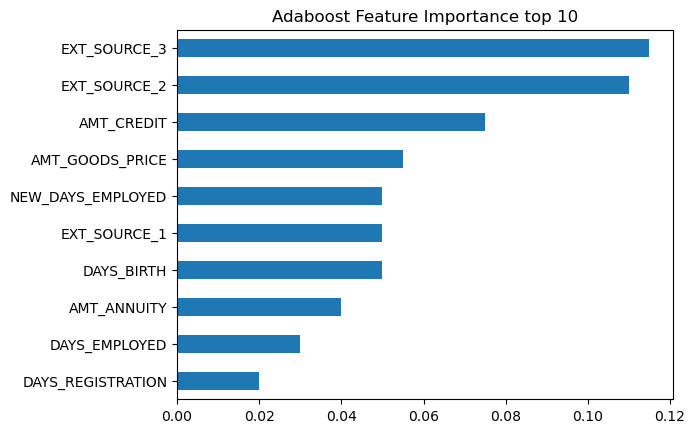

In [102]:
feat_importances = pd.Series(Ab.feature_importances_, index=X_train.columns)
f=feat_importances.nlargest(10).sort_values(ascending=True)
f.plot(kind='barh')
plt.title('Adaboost Feature Importance top 10')
plt.show()

### Now we work with the f2 metric

### Multiple Classifier Testing using GridSearchCV+ f2 score

In [103]:
#Consider the f2 score
f2 = make_scorer(fbeta_score, beta=2, average='binary')

In [104]:
model_params = {
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [50, 75, 100]
        }
    },
    'Adaboost': {
        'model': AdaBoostClassifier(),
        'params' : {
            'n_estimators': [50, 75, 100],
            'learning_rate':[0.01, 0.001, 1.0]
        }
    },
    'Gradient_Boosting': {
        'model': GradientBoostingClassifier(),
        'params' : {
            'n_estimators': [50, 75, 100],
            'learning_rate':[0.01, 0.001, 1.0]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [105]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], scoring=f2, cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,random_forest,0.667293,{'n_estimators': 75}
1,Adaboost,0.679534,"{'learning_rate': 1.0, 'n_estimators': 100}"
2,Gradient_Boosting,0.672598,"{'learning_rate': 1.0, 'n_estimators': 50}"
3,logistic_regression,0.676380,{'C': 10}


### Grid SearchCV + Random Forest Classifier

In [106]:
params = {
    'n_estimators' : [100, 110, 120],
    'max_features':["log2", "sqrt"]
    }

In [107]:
grid_rfc = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params, scoring=f2, cv=5, n_jobs=-1)
grid_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': ['log2', 'sqrt'],
                         'n_estimators': [100, 110, 120]},
             scoring=make_scorer(fbeta_score, beta=2, average=binary))

In [108]:
# print best parameter after tuning
print(grid_rfc.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid_rfc.best_estimator_)

# print the best recall score
print(grid_rfc.best_score_)

{'max_features': 'sqrt', 'n_estimators': 110}
RandomForestClassifier(n_estimators=110)
0.6650589248017639


In [109]:
rf=grid_rfc.best_estimator_

y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[19530,  8703],
       [  831,  1688]])

In [110]:
print('Recall for Random Forest:', recall_score(y_test, y_pred))

Recall for Random Forest: 0.6701071853910282


### SHAP for ensemble methods for Random Forest

**SHAP shows the contribution or the importance of each feature on the prediction of the model, it does not evaluate the quality of the prediction itself.**

In [111]:
# We take a small sample of the test data for shap
x_test=X_test.sample(100)

In [112]:
explainer = shap.TreeExplainer(rf)
sv = explainer.shap_values(x_test)
len(sv)

2

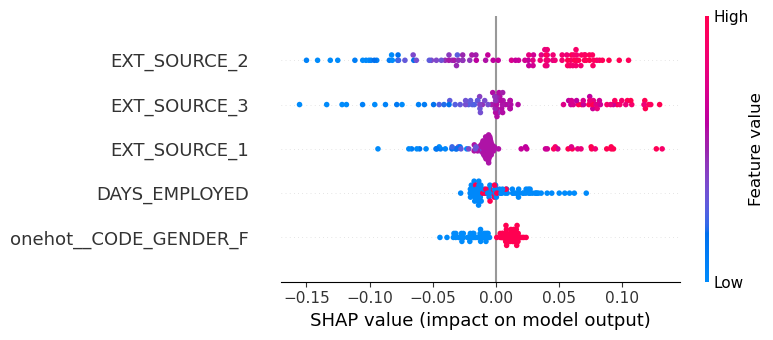

In [113]:
summary_plot(sv[0], x_test, max_display=5)

**EXT_SOURCE_3 being higher, the model tends to classify the data to CLASS 0.**

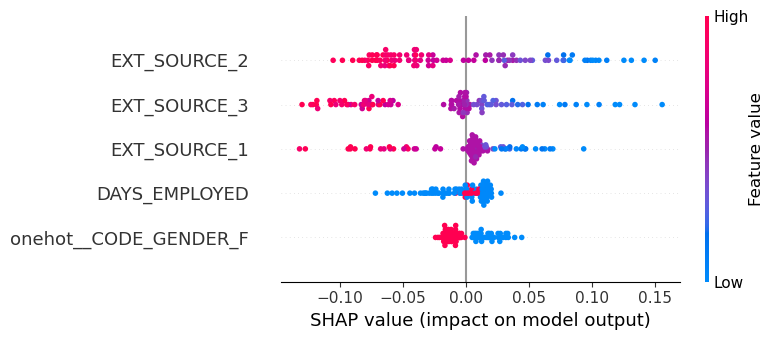

In [114]:
summary_plot(sv[1], x_test, max_display=5)

**EXT_SOURCE_3 value being higher,the model tends to classify the data to CLASS 1.**

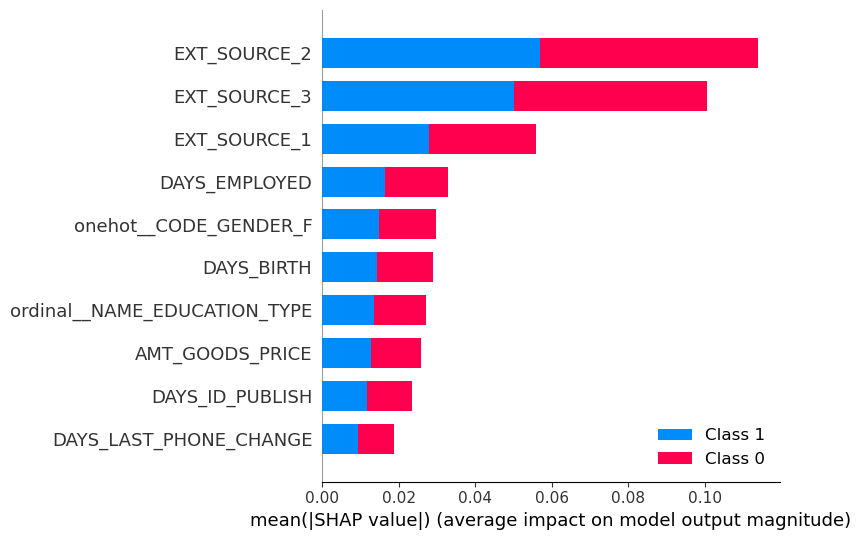

In [115]:
summary_plot(sv, x_test, plot_type = 'bar', max_display=10)

**This plot provides insights into the impact of different features on the model predictions. mean(|SHAP|) is about 0.3 on Class 1, and 0.3 on Class 0. It mean EXT_SOURCE_3 influence is the same Class 1 and Class 0. Also the EXT_SOURCE_2 is the most influential feature.**

### GridSearchCV with XGBoost

In [116]:
params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear']}

In [117]:
grid_xgb = GridSearchCV(estimator=XGBClassifier(), param_grid=params, scoring=f2, cv=5, n_jobs=-1)

In [118]:
grid_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'booster': ['gbtree', 'gblinear'],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [100, 200, 500]},
             scoring=make_scorer(fbeta_score, beta=2, average=binary))

In [119]:
print(grid_xgb.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_xgb.best_estimator_)

print(grid_xgb.best_score_)

{'booster': 'gbtree', 'learning_rate': 0.1, 'n_estimators': 100}
XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
0.6849938543611956


In [120]:
xgb=grid_xgb.best_estimator_

y_pred = xgb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[19420,  8813],
       [  765,  1754]])

In [121]:
print('Recall for XGBoost:', recall_score(y_test, y_pred))

Recall for XGBoost: 0.6963080587534736


### Plot the shap for XGBoost

In [122]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(x_test)

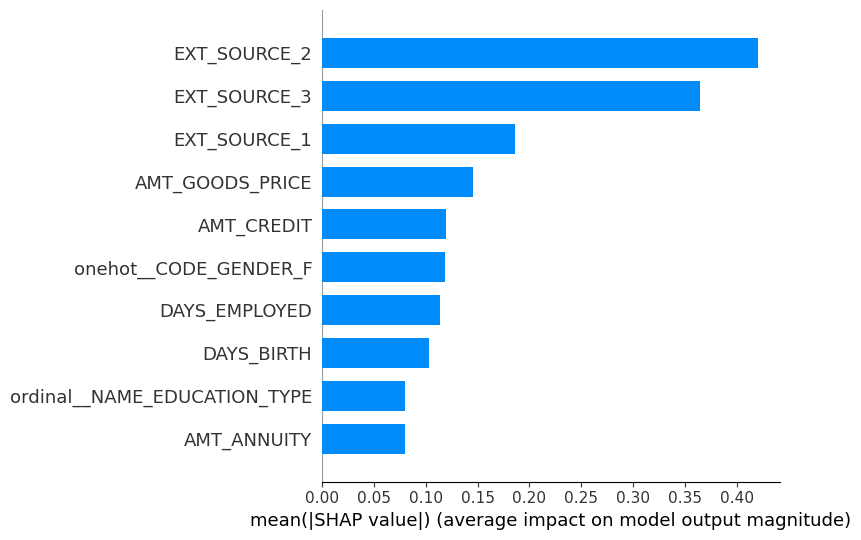

In [123]:
shap.summary_plot(shap_values, x_test, plot_type="bar", max_display=10)